In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Attribute information For bank dataset

   Input variables:
   
   ### Bank client data:
   
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric)
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   ### Related to the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   ### Other attributes:
   
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
  
  Missing Attribute Values: None

Step 1 : Reading the data

In [2]:
bank_data = pd.read_csv('D:/1.0 Studies/DataScience_Excelr/Assignment8_LogisticRegression/bank-full.csv', sep = ";")

In [3]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_data.shape

(45211, 17)

In [7]:
bank_data = bank_data.dropna()
bank_data.shape

(45211, 17)

In [8]:
print(list(bank_data.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [9]:
#Output variable
bank_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [10]:
bank_data[bank_data.duplicated()].shape #found no duplicates

(0, 17)

In [11]:
corr=bank_data.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


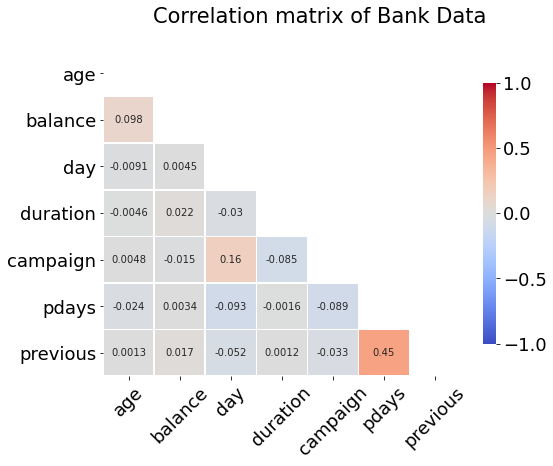

In [12]:
# Generating a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            cbar_kws = {'shrink': 0.8,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, vmax=1, 
            annot = True,
            annot_kws = {"size": 10},
            center=0, linewidths=.5)

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
f.suptitle('Correlation matrix of Bank Data', fontsize=21)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [13]:
#Count output Yes, No.
bank_data.groupby('y').sum()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,1630374,52046909,634452,8830060,113632,1454014,20047
yes,220393,9542773,80172,2841751,11324,363370,6190


In [14]:
bank_data['y'].value_counts(ascending=True)

yes     5289
no     39922
Name: y, dtype: int64

In [15]:
round(bank_data['y'].value_counts(normalize=True),2)

no     0.88
yes    0.12
Name: y, dtype: float64

Output class is imbalanced. We need to balance the dataset. Let's find out more about the df.

In [16]:
round(bank_data.groupby('y').mean(),2)

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.84,1303.71,15.89,221.18,2.85,36.42,0.50
yes,41.67,1804.27,15.16,537.29,2.14,68.70,1.17


Some observations -

The pdays (days since the customer was last contacted) is lower for the customers who did not buy the deposit. It means those who did not buy are contacted frequently compared to those who bought the deposit.

Campaigns are lesser for customers who bought the term deposit, this defies common logic.

In [17]:
round(bank_data.groupby('age').mean(),2) 

,balance,day,duration,campaign,pdays,previous
age,,,,,,
18,372.42,11.83,214.17,1.75,29.08,0.50
19,539.77,12.51,175.49,2.91,48.69,0.63
20,841.94,16.12,213.10,2.12,48.44,1.04
21,866.76,14.80,208.66,1.89,39.59,0.59
22,935.60,14.68,234.97,1.98,42.75,0.58
...,...,...,...,...,...,...
90,356.50,8.00,354.50,2.00,-1.00,0.00
92,775.00,24.00,238.50,3.50,47.50,1.50
93,775.00,13.00,668.00,2.00,95.00,8.00


We can do further grouping and analysis. Nothing conclusive.

### Data Visualization

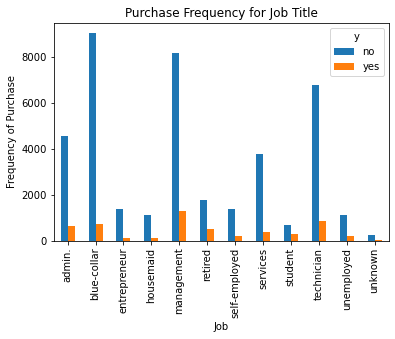

In [18]:
%matplotlib inline
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

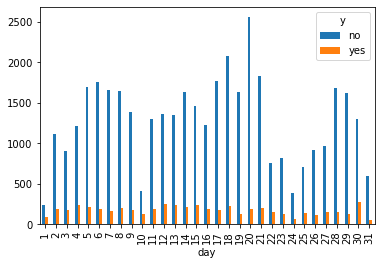

In [19]:
pd.crosstab(bank_data.day,bank_data.y).plot(kind='bar')
plt.show()

Day has no impact on output.

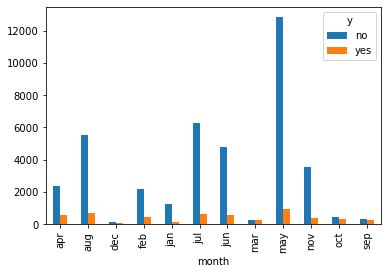

In [20]:
pd.crosstab(bank_data.month,bank_data.y).plot(kind ="bar")
plt.show()

Month looks correlated to output.

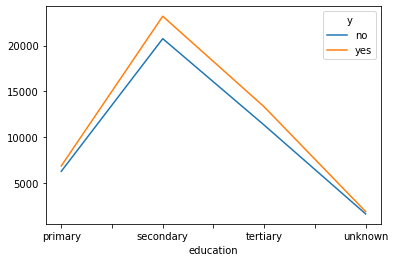

In [21]:
pd.crosstab(bank_data.education,bank_data.y).plot(kind ="line", stacked = True)
plt.show()

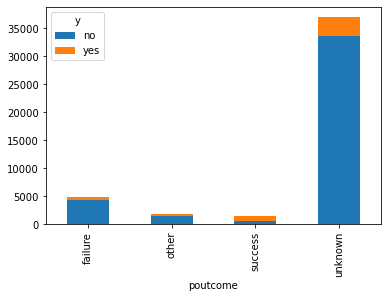

In [22]:
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind ="bar", stacked = True)
plt.show()

poutcomes seems like a good predictor of outcome variable

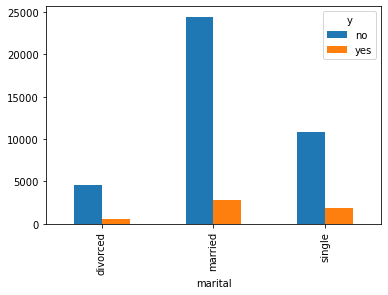

In [23]:
pd.crosstab(bank_data.marital,bank_data.y).plot(kind ="bar", stacked = False)
plt.show()

In [24]:
pd.crosstab(bank_data.contact,bank_data.y)

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


Contact is a predictor

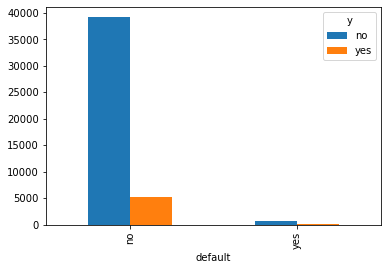

In [25]:
pd.crosstab(bank_data.default,bank_data.y).plot(kind ="bar", stacked = False)
plt.show()

### Creating Dummy Variables

In [26]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [27]:
bank_data2=pd.get_dummies(bank_data,columns=['job','marital','education','default','housing','loan','contact',
                                             'month','poutcome'])
bank_data2

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1


In [28]:
# create dummies for job Column
#dummies = pd.get_dummies(bank_data['job']).rename(columns=lambda x: 'job_' + str(x))
# bring the dummies back into the original dataset
#bank_data = pd.concat([bank_data, dummies], axis=1)
#bank_data

In [29]:
#Convert the otput variable into dummy variable
bank_data2['Y'] = bank_data2.y.map({'no':0,'yes':1})
bank_data2.drop(["y"],axis=1, inplace=True)
bank_data2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [30]:
#Convert the otput variable into dummy variable
#row_indexes=bank_data2[bank_data2['y']=="yes"].index
#bank_data2.loc[row_indexes,'output']=1
#row_indexes=bank_data2[bank_data2['y']=="no"].index
#bank_data2.loc[row_indexes,'output']=0
#bank_data2

In [31]:
bank_data2.iloc[:,:].isnull().values.any()

False

In [32]:
bank_data2.shape

(45211, 52)

In [33]:
from sklearn.linear_model import LogisticRegression
X=bank_data2.iloc[:,:-1]
y=bank_data2.iloc[:,-1]
y = y.values.ravel()
classifier = LogisticRegression(solver='lbfgs',max_iter=100000)
classifier.fit(X,y)

LogisticRegression(max_iter=100000)

In [34]:
classifier.coef_ # coefficients of features

array([[-9.78516101e-04,  1.39372325e-05,  8.25157002e-03,
         4.19178007e-03, -8.46307817e-02, -2.96760354e-04,
         9.36840128e-03,  5.81419337e-02, -2.13866023e-01,
        -2.96744363e-01, -3.38928973e-01, -9.11214526e-02,
         4.31886117e-01, -2.51229266e-01, -1.95037299e-01,
         4.57751560e-01, -9.18971720e-02, -1.32175314e-01,
        -8.34732906e-02, -1.85718354e-01, -4.41425113e-01,
        -1.19550076e-01, -4.04218017e-01, -2.15355786e-01,
         2.36778825e-03, -1.29487527e-01, -4.30119904e-01,
        -3.16573638e-01, -4.52087528e-02, -7.01484790e-01,
        -1.94268637e-01, -5.52424905e-01,  3.76770967e-01,
         1.89084682e-01, -1.31254919e+00, -3.35453737e-02,
        -8.24247146e-01,  3.50673068e-01, -2.66267517e-01,
        -1.12513164e+00, -9.18897215e-01,  4.12537589e-01,
         1.41319400e+00, -4.38704865e-01, -1.01298493e+00,
         9.15788132e-01,  7.80892358e-01, -7.97509211e-01,
        -6.31549050e-01,  1.59375541e+00, -9.11390689e-0

In [46]:
#Confusion Matrix
#Score
classifier.score(X,y)
print("Model score : ",classifier.score(X,y))

###Confusion matrix with sklearn

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
y_pred=classifier.predict(X)

confusion_matrix(y_pred,y)

print("confusion matrix :  ""\n",confusion_matrix(y_pred,y))

Model score :  0.9021698259273185
confusion matrix :  
 [[38937  3438]
 [  985  1851]]


In [47]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.46      5289

    accuracy                           0.90     45211
   macro avg       0.79      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [ ]:
#ROC curve

In [48]:
classifier.predict_proba (X)

array([[0.98594114, 0.01405886],
       [0.99028025, 0.00971975],
       [0.99701957, 0.00298043],
       ...,
       [0.02340166, 0.97659834],
       [0.89531923, 0.10468077],
       [0.89186294, 0.10813706]])

Text(0, 0.5, 'True Positive Rate')

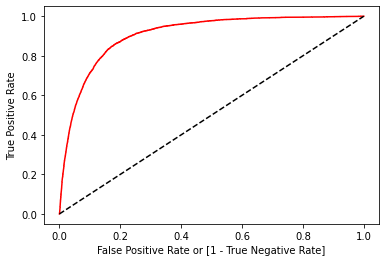

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [50]:
auc

0.6626492633408828